In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score,precision_score, recall_score, f1_score,confusion_matrix
from imblearn.over_sampling import SMOTE

C:\Users\loves\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('FastagFraudDetection.csv')

df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


# Dataset Description

In [3]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [4]:
df.tail()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud
4999,5000,3/10/2023 0:59,Bus,FTG-459-WSX-543,C-103,Regular,Large,330,125,"13.21331620748757, 77.55413526894684",86,KA37AB3456,Fraud


In [5]:
df.sample(5)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
1081,1082,4/29/2023 5:05,Truck,FTG-935-EDC-761,C-103,Regular,Large,340,340,"12.84197701525119, 77.67547528176169",97,AP32EF9012,Not Fraud
899,900,4/22/2023 0:00,Truck,FTG-752-BVC-652,C-103,Regular,Large,290,290,"13.042660878688794, 77.47580097259879",45,KA17KL0123,Not Fraud
4716,4717,12/20/2023 13:51,Van,FTG-176-CDE-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,TN23CD2345,Not Fraud
2584,2585,7/14/2023 7:09,Bus,FTG-055-ZXC-543,C-103,Express,Large,350,350,"13.059816123454882, 77.77068662374292",61,KA45HI6289,Not Fraud
4420,4421,3/15/2023 3:42,Motorcycle,NaN,D-106,Regular,Small,0,0,"12.936687032945434, 77.53113977439017",70,MP12ST2345,Not Fraud


# 3 . Summary Statistics

In [6]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [7]:
df.select_dtypes('number').mean()

Transaction_ID        2500.5000
Transaction_Amount     161.0620
Amount_paid            141.2610
Vehicle_Speed           67.8512
dtype: float64

In [8]:
df.select_dtypes('number').median()

Transaction_ID        2500.5
Transaction_Amount     130.0
Amount_paid            120.0
Vehicle_Speed           67.0
dtype: float64

In [9]:
df.select_dtypes('number').mode().iloc[0]

Transaction_ID         1.0
Transaction_Amount     0.0
Amount_paid            0.0
Vehicle_Speed         55.0
Name: 0, dtype: float64

In [10]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [11]:
df['FastagID'].fillna(df['FastagID'].mode()[0],inplace=True)

C:\Users\loves\AppData\Local\Temp\ipykernel_23680\3963440092.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FastagID'].fillna(df['FastagID'].mode()[0],inplace=True)


In [12]:
df.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               5000 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [14]:
df.drop_duplicates(inplace = True)

df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,FTG-000-QAZ-210,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


# 5 Data Visualization

# 6 Visualize the distribution of the target variable

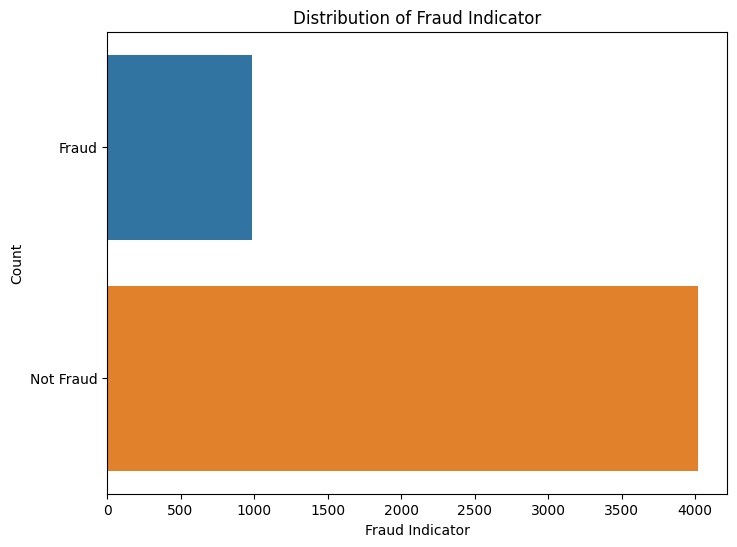

In [15]:
plt.figure(figsize = (8,6))
sns.countplot(df , y ='Fraud_indicator')
plt.title('Distribution of Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

# 7 Visualize the distribution of Transaction Amounts

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


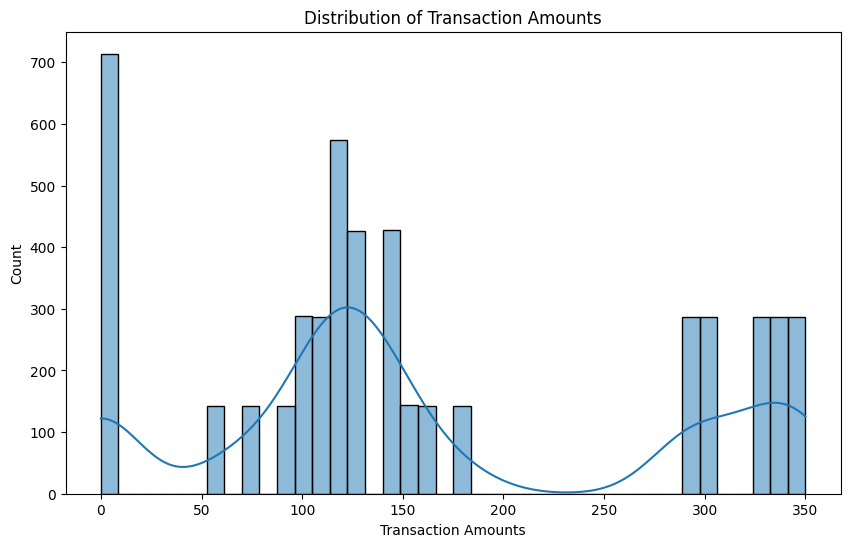

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['Transaction_Amount'], bins = 40, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amounts')
plt.ylabel('Count')
plt.show()

# 8 .visualize the distribution of Amount Paid

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


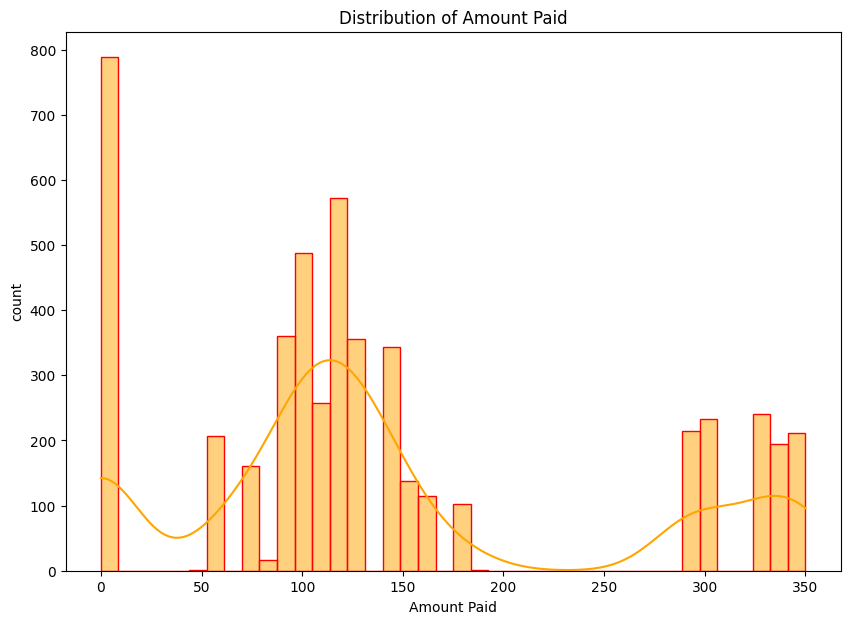

In [17]:
plt.figure(figsize=(10,7))
sns.histplot(df['Amount_paid'],bins = 40, kde=True, color= 'orange', edgecolor='red')
plt.title('Distribution of Amount Paid')
plt.xlabel('Amount Paid')
plt.ylabel('count')
plt.show()

# 9 Visualize the distribution of Vehicle Speed

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


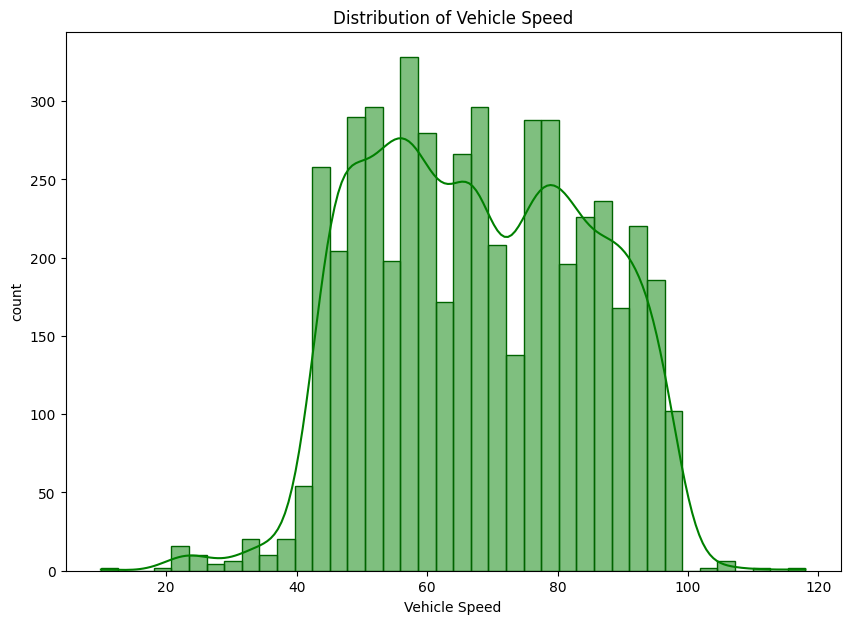

In [18]:
plt.figure(figsize=(10,7))
sns.histplot(df['Vehicle_Speed'],bins = 40, kde=True, color= 'green', edgecolor='darkgreen')
plt.title('Distribution of Vehicle Speed')
plt.xlabel('Vehicle Speed')
plt.ylabel('count')
plt.show()

# 10 Visualize the relationship between Transaction Amount and Amount Paid

Text(0.5, 1.0, 'Transaction Amount vs Amount Paid')

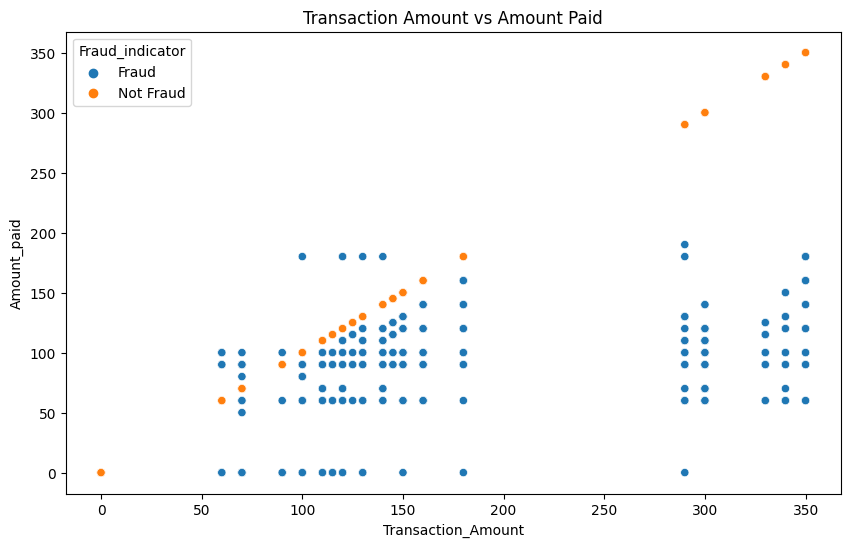

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Transaction_Amount', y='Amount_paid', hue='Fraud_indicator',data=df)
plt.title('Transaction Amount vs Amount Paid')

# 11 Countplots for Vehicle type variables by Fraud Indicator

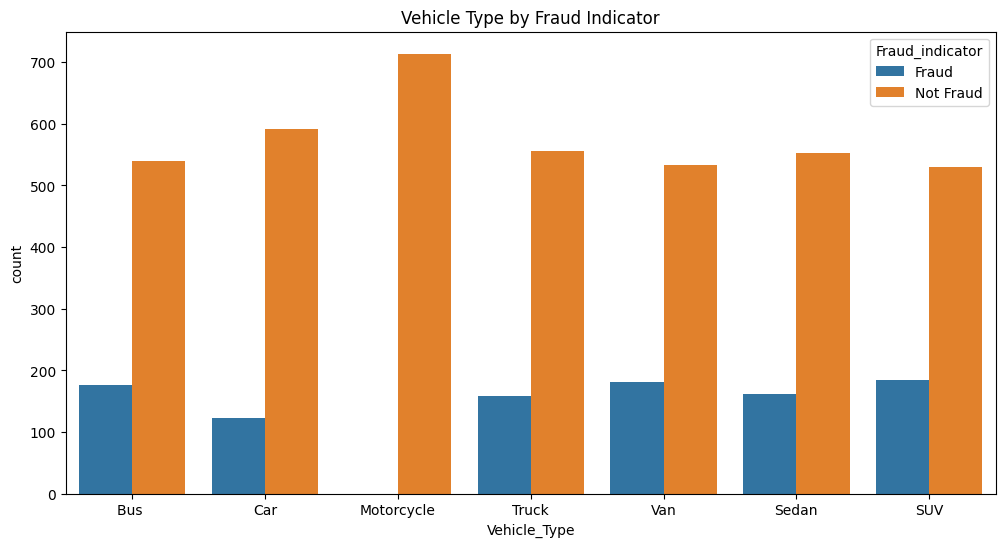

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Vehicle_Type',hue='Fraud_indicator', data = df)
plt.title('Vehicle Type by Fraud Indicator')
plt.show()

# 12 Countplots for Lane Type variables by Fraud Indicator

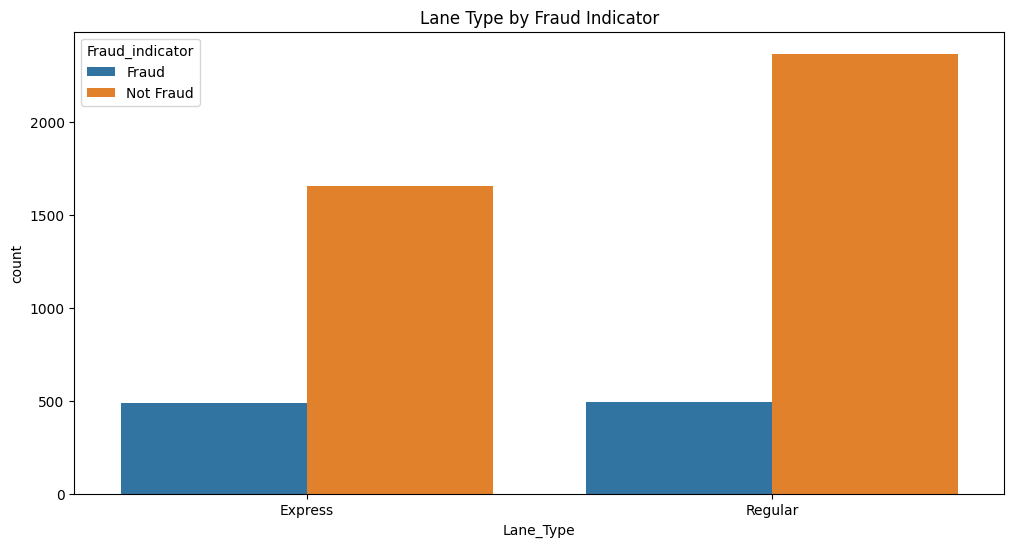

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Lane_Type',hue='Fraud_indicator', data = df)
plt.title('Lane Type by Fraud Indicator')
plt.show()

# 13 Countplots For Geographical Location variables by fraud indicator

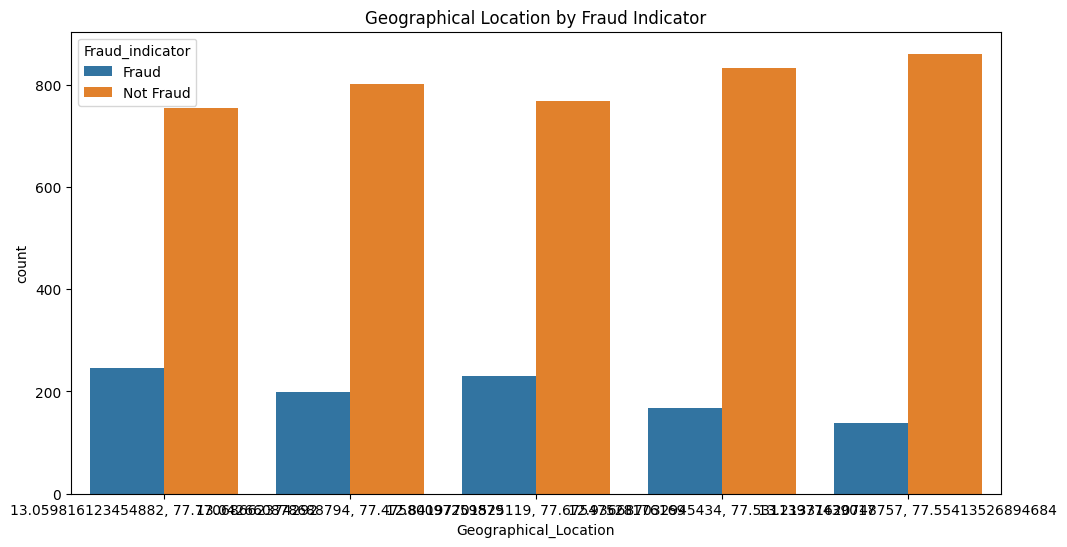

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Geographical_Location',hue='Fraud_indicator', data = df)
plt.title('Geographical Location by Fraud Indicator')
plt.show()

# 14 Check the Pairplot

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

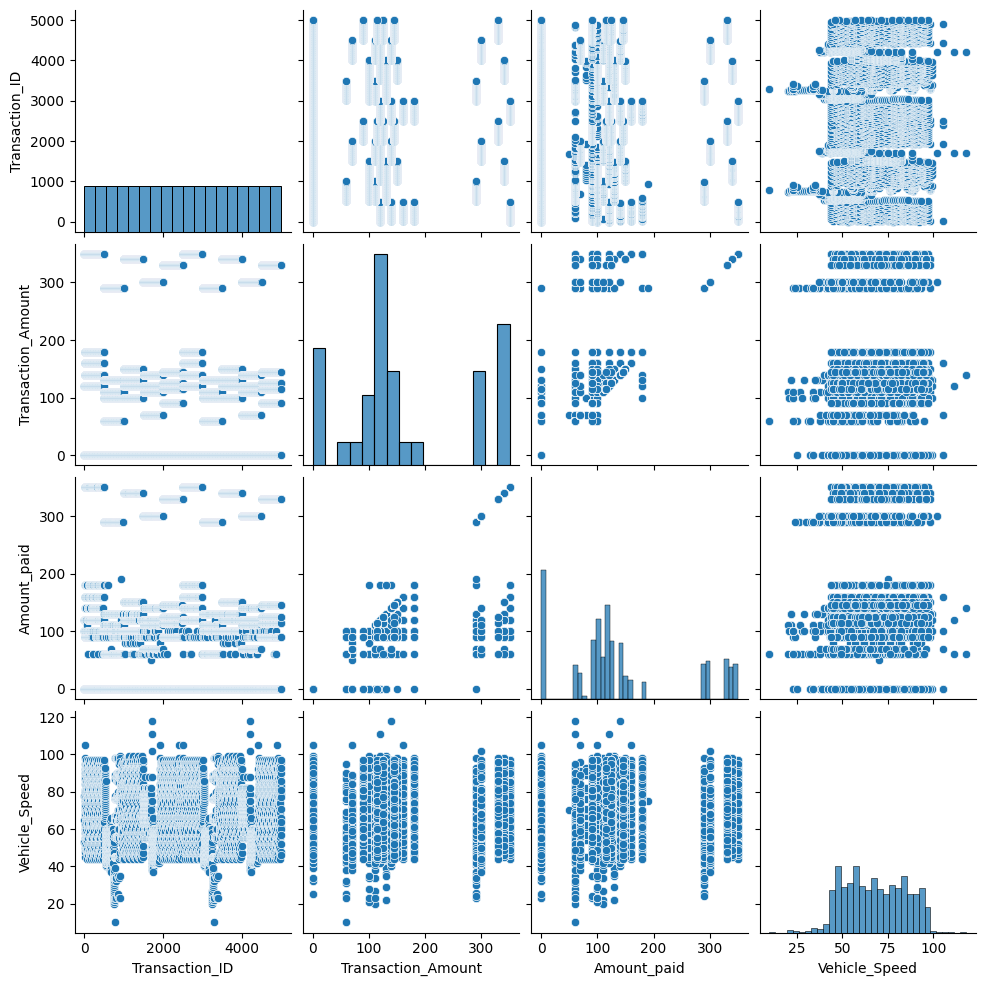

In [23]:
sns.pairplot(df)

# 15 Heap Map

In [24]:
df1 = df.select_dtypes('number')
df1

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
0,1,350,120,65
1,2,120,100,78
2,3,0,0,53
3,4,350,120,92
4,5,140,100,60
...,...,...,...,...
4995,4996,330,330,81
4996,4997,125,125,64
4997,4998,115,115,93
4998,4999,145,145,57


In [25]:
df1.corr()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
Transaction_ID,1.000000,-0.023515,0.044433,0.014378
Transaction_Amount,-0.023515,1.000000,0.870078,0.053229
Amount_paid,0.044433,0.870078,1.000000,0.039027
Vehicle_Speed,0.014378,0.053229,0.039027,1.000000


<Axes: >

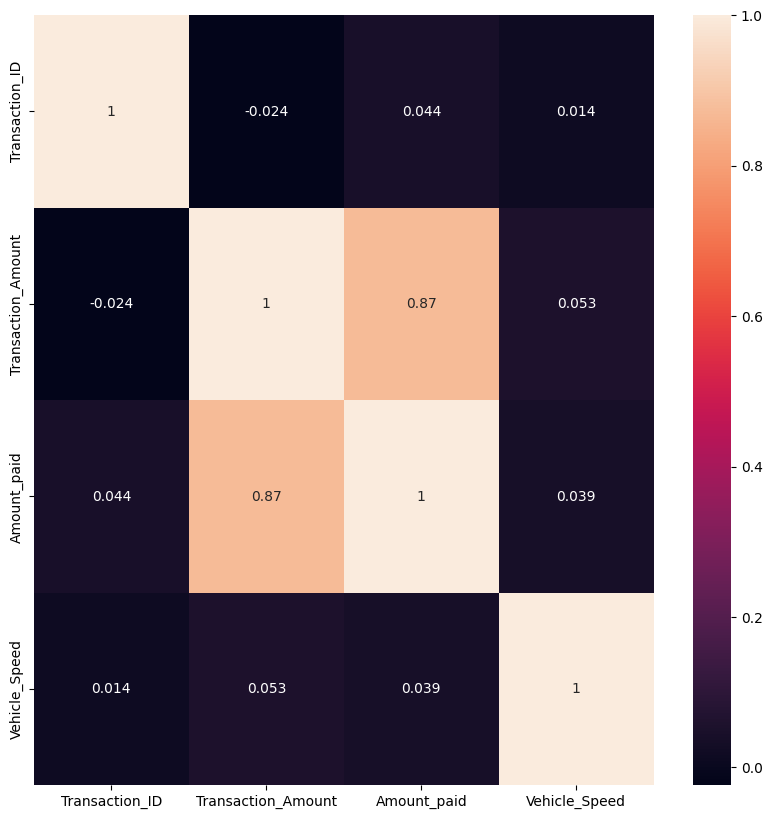

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True)

# 16 Label Encoding For Categorical Features: Ensure that categorical features are encoded

In [27]:
label_encoders = {}
for column in ['Vehicle_Type','Lane_Type','Vehicle_Dimensions','Geographical_Location',
              'Vehicle_Plate_Number','Fraud_indicator','FastagID','TollBoothID',]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [28]:
df.head(3)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,0,2,0,0,0,350,120,3,65,1482,0
1,2,1/7/2023 14:55,1,9,1,1,2,120,100,3,78,3066,0
2,3,1/8/2023 18:25,2,0,3,1,2,0,0,3,53,3663,1


# 17 Feature Extraction : Additional time-based features (Hour, Day, Month, Weekday) have been extracted from the Timestamp

In [29]:
# Convert Timestamp to datetime and extract new features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df["Hour"] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.weekday

df.sample(8)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,Day,Month,Weekday
1585,1586,2023-04-01 05:45:00,5,4143,2,1,0,300,300,1,68,3546,1,5,1,4,5
1232,1233,2023-06-25 23:40:00,0,3837,2,0,0,340,340,0,50,937,1,23,25,6,6
1765,1766,2023-10-28 07:30:00,1,3292,0,1,2,70,70,1,55,3635,1,7,28,10,5
4179,4180,2023-01-07 04:40:00,3,1300,1,1,0,140,140,1,58,567,1,4,7,1,5
3113,3114,2023-09-03 06:58:00,6,3525,1,1,1,110,110,2,58,2877,1,6,3,9,6
3809,3810,2023-01-06 03:26:00,0,627,2,1,0,340,340,0,98,4842,1,3,6,1,4
2526,2527,2023-11-19 22:49:00,4,906,0,0,1,160,140,3,52,1902,0,22,19,11,6
2450,2451,2023-09-07 21:00:00,0,2387,2,0,0,330,330,4,54,820,1,21,7,9,3


In [30]:
# Drop the original Timestamp column and Transaction_ID as it is not informative
df.drop(columns=['Timestamp','Transaction_ID'],inplace=True)

In [31]:
df.head(5)

,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,Day,Month,Weekday
0,0,2,0,0,0,350,120,3,65,1482,0,11,6,1,4
1,1,9,1,1,2,120,100,3,78,3066,0,14,7,1,5
2,2,0,3,1,2,0,0,3,53,3663,1,18,8,1,6
3,5,241,2,1,0,350,120,3,92,1498,0,2,9,1,0
4,6,2860,1,0,1,140,100,3,60,2409,0,6,10,1,1


# 17.1 Model Training : Train a variety of machine learning models(e.g., Logistic Regression , Random Forest ,Gradient Boosting)

# 17.2 Model Evaluation:Evaluate model performance using metrices such as precision , recall, F1 Score, and Accuracy. Additionally ,handle class imbalanced using techniques such as SMOTE(Synthetic Minority Over-sampling Technique) if necessary

In [32]:
x = df.drop(columns=['Fraud_indicator'])
y = df['Fraud_indicator']

# split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x, y , test_size=0.2,random_state=42)

x_train, x_test, y_train, y_test

(      Vehicle_Type  FastagID  TollBoothID  Lane_Type  Vehicle_Dimensions  \
 4227             4       155            0          1                   1   
 4676             3      1028            1          0                   0   
 800              2         0            5          1                   2   
 3671             2         0            5          1                   2   
 4193             3      1369            1          1                   0   
 ...            ...       ...          ...        ...                 ...   
 4426             1      2434            0          0                   2   
 466              6      3232            1          0                   1   
 3092             6      3449            1          0                   1   
 3772             4       716            0          0                   1   
 860              3      3585            1          0                   0   
 
       Transaction_Amount  Amount_paid  Geographical_Location  Vehicle_Spe

# 18 Logistic Regression Model 


In [33]:
ml = LogisticRegression()
ml.fit(x_train,y_train)

C:\Users\loves\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred = ml.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [35]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Logistic Regression Model Results:")
print("Accuracy:", accuracy)
print('confusion Matrix :',conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Logistic Regression Model Results:
Accuracy: 0.984
confusion Matrix : [[201  16]
 [  0 783]]
Precision: 0.9799749687108886
Recall: 1.0
F1 Score: 0.9898862199747156


# 19 Decision Tree Classification

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
ml1 = DecisionTreeClassifier()
ml1.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred1 = ml1.predict(x_test)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [39]:
accuracy = accuracy_score(y_test,y_pred1)
conf_matrix = confusion_matrix(y_test,y_pred1)
precision = precision_score(y_test,y_pred1)
recall = recall_score(y_test,y_pred1)
f1 = f1_score(y_test,y_pred1)

print("Logistic Regression Model Results:")
print("Accuracy:", accuracy)
print('confusion Matrix :',conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Logistic Regression Model Results:
Accuracy: 0.999
confusion Matrix : [[216   1]
 [  0 783]]
Precision: 0.9987244897959183
Recall: 1.0
F1 Score: 0.9993618379068283


In [40]:
ml.score(x_train,y_train)

0.9865

In [41]:
ml.score(x_test,y_test)

0.984

# 20 Random Forest

In [42]:
ml2 = RandomForestClassifier()
ml2.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
y_pred2 = ml2.predict(x_test)
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [44]:
accuracy2 = accuracy_score(y_test,y_pred2)
conf_matrix2 = confusion_matrix(y_test,y_pred2)
precision2 = precision_score(y_test,y_pred2)
recall2 = recall_score(y_test,y_pred2)
f12 = f1_score(y_test,y_pred2)

print("Logistic Regression Model Results:")
print("Accuracy:", accuracy2)
print('confusion Matrix :',conf_matrix2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f12)

Logistic Regression Model Results:
Accuracy: 0.98
confusion Matrix : [[197  20]
 [  0 783]]
Precision: 0.975093399750934
Recall: 1.0
F1 Score: 0.987389659520807


# 21 Support Vector Machine

In [45]:
from sklearn.svm import SVC

In [46]:
ml3 = SVC()
ml3.fit(x_train,y_train)

SVC()

In [47]:
y_pred3 = ml3.predict(x_test)
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [48]:
accuracy3 = accuracy_score(y_test,y_pred3)
conf_matrix3 = confusion_matrix(y_test,y_pred3)
precision3 = precision_score(y_test,y_pred3)
recall3 = recall_score(y_test,y_pred3)
f13 = f1_score(y_test,y_pred3)

print("Logistic Regression Model Results:")
print("Accuracy:", accuracy3)
print('confusion Matrix :',conf_matrix3)
print("Precision:", precision3)
print("Recall:", recall3)
print("F1 Score:", f13)

Logistic Regression Model Results:
Accuracy: 0.793
confusion Matrix : [[ 10 207]
 [  0 783]]
Precision: 0.7909090909090909
Recall: 1.0
F1 Score: 0.883248730964467


# 22 Naive bayes Classifier

In [49]:
 from sklearn.naive_bayes import GaussianNB

In [50]:
ml4 =  GaussianNB()
ml4.fit(x_train,y_train)

GaussianNB()

In [51]:
y_pred4 = ml4.predict(x_test)
y_pred4

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,

In [52]:
accuracy4 = accuracy_score(y_test,y_pred4)
conf_matrix4 = confusion_matrix(y_test,y_pred4)
precision4 = precision_score(y_test,y_pred4)
recall4 = recall_score(y_test,y_pred4)
f14 = f1_score(y_test,y_pred4)

print("Naive Bayes Model Results:")
print("Accuracy:", accuracy4)
print("Confusion Matrix:", conf_matrix4)
print("Precision:", precision4)
print("Recall:", recall4)
print("F1 Score:", f14)


Naive Bayes Model Results:
Accuracy: 0.777
Confusion Matrix: [[148  69]
 [154 629]]
Precision: 0.9011461318051576
Recall: 0.8033205619412516
F1 Score: 0.849426063470628


# 23 K neighborsClassifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
ml5 = KNeighborsClassifier(n_neighbors = 4)
ml5.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [55]:
y_pred5 = ml5.predict(x_test)
y_pred5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [56]:
accuracy5 = accuracy_score(y_test,y_pred5)
conf_matrix5= confusion_matrix(y_test,y_pred5)
precision5 = precision_score(y_test,y_pred5)
recall5 = recall_score(y_test,y_pred5)
f15 = f1_score(y_test,y_pred5)
print("Naive Bayes Model Results:")
print("Accuracy:", accuracy5)
print("Confusion Matrix:", conf_matrix5)
print("Precision:", precision5)
print("Recall:", recall5)
print("F1 Score:", f15)


Naive Bayes Model Results:
Accuracy: 0.792
Confusion Matrix: [[ 89 128]
 [ 80 703]]
Precision: 0.8459687123947052
Recall: 0.8978288633461047
F1 Score: 0.8711276332094176


# 24 Gradient Boosting Classification

In [57]:
ml6 = GradientBoostingClassifier()
ml6.fit(x_train,y_train)

GradientBoostingClassifier()

In [58]:
y_pred6 = ml6.predict(x_test)
y_pred6

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [59]:
accuracy6 = accuracy_score(y_test,y_pred6)
conf_matrix6 = confusion_matrix(y_test,y_pred6)
precision6 = precision_score(y_test,y_pred6)
recall6 = recall_score(y_test,y_pred6)
f16 = f1_score(y_test,y_pred6)

print("Naive Bayes Model Results:")
print("Accuracy:", accuracy6)
print("Confusion Matrix:", conf_matrix6)
print("Precision:", precision6)
print("Recall:", recall6)
print("F1 Score:", f16)


Naive Bayes Model Results:
Accuracy: 0.988
Confusion Matrix: [[205  12]
 [  0 783]]
Precision: 0.9849056603773585
Recall: 1.0
F1 Score: 0.9923954372623575


# 25 here are the accuracy scores for different machine learning models

Logistic Regression = 98.4%

Decision Tree = 99.9%

Random Forest = 97.7%

SVM(Support Vector Machine) =79.5%

Naive Bayes =77.7%

KNN (K-Nearest Neighbors) = 79.7%

Gradient Boosting = 98.8%

NameError: name 'bars' is not defined

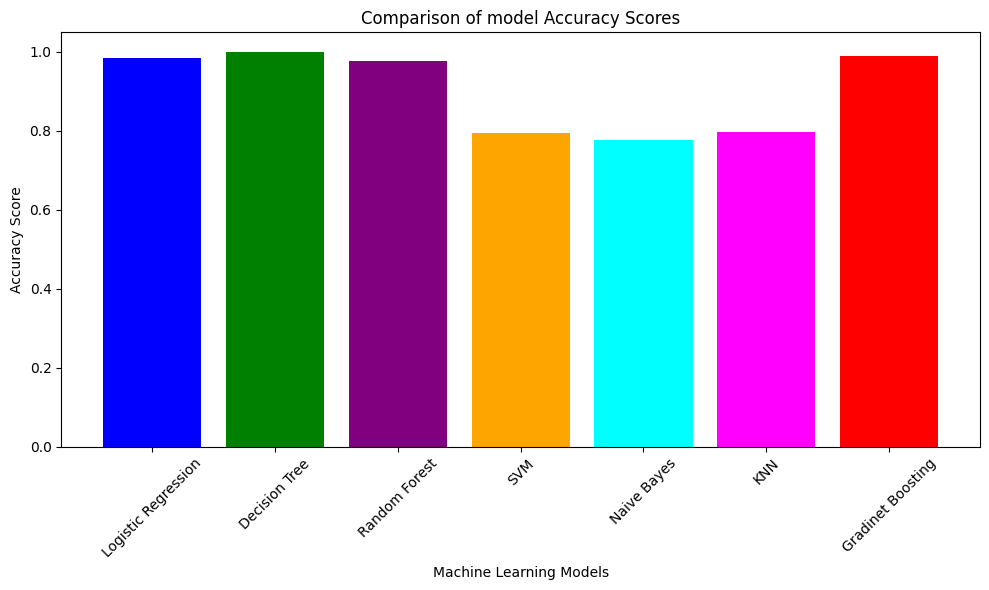

In [60]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes','KNN','Gradinet Boosting']

accuracy_scores = [0.984, 0.999 , 0.977, 0.795, 0.777, 0.797, 0.988]
colors = ['blue','green','purple','orange','cyan','magenta','red']


plt.figure(figsize=(10,6))
plt.bar(model_names,accuracy_scores, color = colors)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of model Accuracy Scores')
plt.xticks(rotation =45)
plt.tight_layout()
for bar, score in zip(bars, accuracy_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() +bar.get_width()/2 ,yval +0.01 ,round(score,3),ha= 'center', va='butttom',fontsize=8)